# Baseline Performance Test

In [300]:
import time
import statistics

def bench(func, args, repeat=10):
    times = []
    for _ in range(repeat):
        start = time.perf_counter_ns()
        func(*args)
        times.append(time.perf_counter_ns() - start)
    return statistics.mean(times)

In [301]:
from nearorder.math.generate import base_sequence

seq = base_sequence(100000)
# seq

## Search Performance under In-Sequence Swaps

,disorder,inversion_count,inversion_ratio,local_inversion_ratio,max_monotonic_run,displacement_sum
0,0,0,0.000000e+00,0.000000,100000,0
1,5000,4774,9.548095e-07,0.045420,194,9542
2,10000,9062,1.812418e-06,0.082551,91,18076
3,15000,13114,2.622826e-06,0.113811,92,26072
4,20000,16974,3.394834e-06,0.141861,58,33648
5,25000,20294,4.058841e-06,0.162402,40,40054
6,30000,23572,4.714447e-06,0.182452,37,46314
7,35000,26716,5.343253e-06,0.199122,37,52166
8,40000,29728,5.945659e-06,0.214212,29,57694
9,45000,32570,6.514065e-06,0.226492,42,62834


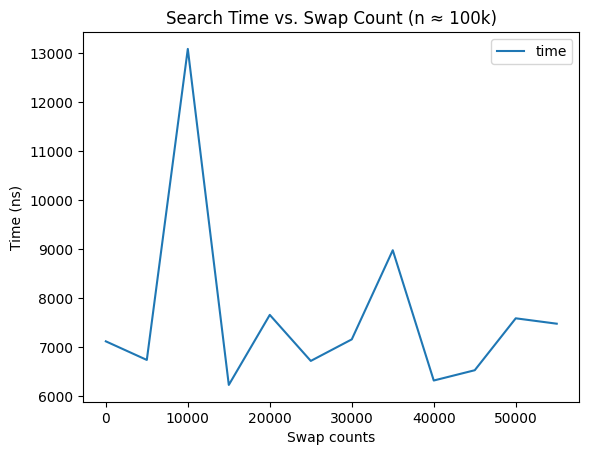

In [302]:
from nearorder.math.generate import inject_adjacent_swaps
from nearorder.math.metrics import disorder_metrics
from nearorder.bisect import binary_search

import random
import pandas as pd

num = random.randint(1, 100000)

def test_find_num(xs):
    binary_search(xs, num)

time_rows = []
disorder_rows = []

for disorder in range(0, 60000, 5000):
    target = inject_adjacent_swaps(xs=seq, swaps=disorder)
    t = bench(test_find_num, args=[target])
    time_rows.append({"disorder": disorder, "time": t})
    metrics = disorder_metrics(target)
    metrics.pop('n')
    disorder_rows.append({"disorder": disorder} | metrics)

df1 = pd.DataFrame(time_rows)
ax = df1.plot(x="disorder")
ax.set_xlabel("Swap counts")
ax.set_ylabel("Time (ns)")
ax.set_title("Search Time vs. Swap Count (n ≈ 100k)")

df2 = pd.DataFrame(disorder_rows)
df2

At the 100k scale, varying the swap count between 10,000 and 60,000 results in little difference in search performance.

## Search Performance under Block-Level Disorder

,disorder,inversion_count,inversion_ratio,local_inversion_ratio,max_monotonic_run,displacement_sum
0,0,0,0.000000,0.00000,100000,0
1,50,2460000,0.000492,0.00498,749,4920000
2,100,5030000,0.001006,0.00251,1299,10060000
3,150,7890000,0.001578,0.00165,1949,15780000
4,200,10400000,0.002080,0.00123,2599,20800000
5,250,13062500,0.002613,0.00095,3249,26125000
6,300,15390000,0.003078,0.00081,3899,30780000
7,350,18252500,0.003651,0.00070,4549,36505000
8,400,20800000,0.004160,0.00060,5199,41600000
9,450,22680000,0.004536,0.00053,5849,45360000


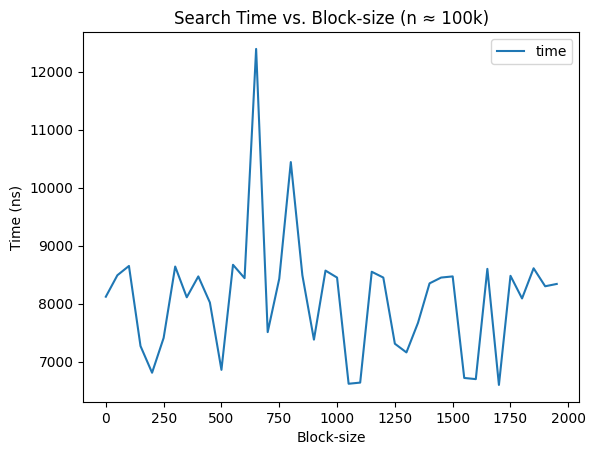

In [303]:
from nearorder.math.generate import block_shuffle

time_rows = []
disorder_rows = []

for disorder in range(0, 2000, 50):
    target = block_shuffle(seq, disorder, seed=114)
    t = bench(test_find_num, args=[target])
    time_rows.append({"disorder": disorder, "time": t})
    metrics = disorder_metrics(target)
    metrics.pop('n')
    disorder_rows.append({"disorder": disorder} | metrics)

df1 = pd.DataFrame(time_rows)
ax = df1.plot(x="disorder")
ax.set_xlabel("Block-size")
ax.set_ylabel("Time (ns)")
ax.set_title("Search Time vs. Block-size (n ≈ 100k)")

df2 = pd.DataFrame(disorder_rows)
df2

Block size does not significantly impact search performance under typical data sizes.

## Search Performance under Periodic Local Disorder

,disorder,inversion_count,inversion_ratio,local_inversion_ratio,max_monotonic_run,displacement_sum
0,1,99999,2.000000e-05,0.00001,99999,199998
1,51,1960,3.920039e-07,0.01960,51,3920
2,101,990,1.980020e-07,0.00990,101,1980
3,151,662,1.324013e-07,0.00662,151,1324
4,201,497,9.940099e-08,0.00497,201,994
...,...,...,...,...,...,...
195,9751,10,2.000020e-09,0.00010,9751,20
196,9801,10,2.000020e-09,0.00010,9801,20
197,9851,10,2.000020e-09,0.00010,9851,20
198,9901,10,2.000020e-09,0.00010,9901,20


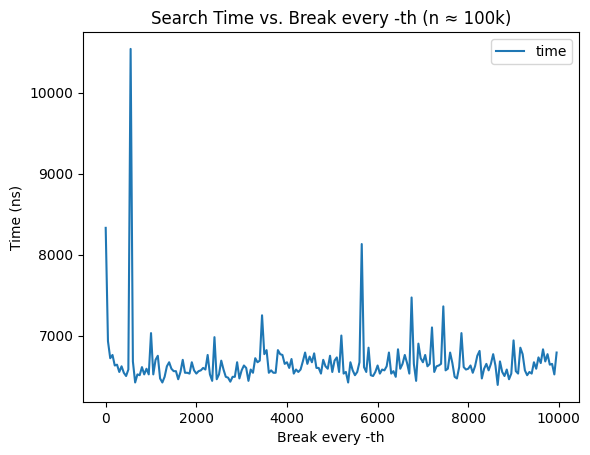

In [314]:
from nearorder.math.generate import break_runs

time_rows = []
disorder_rows = []

for disorder in range(1, 10000, 50):
    target = break_runs(seq, disorder)
    t = bench(test_find_num, args=[target])
    time_rows.append({"disorder": disorder, "time": t})
    metrics = disorder_metrics(target)
    metrics.pop('n')
    disorder_rows.append({"disorder": disorder} | metrics)

df1 = pd.DataFrame(time_rows)
ax = df1.plot(x="disorder")
ax.set_xlabel("Break every -th")
ax.set_ylabel("Time (ns)")
ax.set_title("Search Time vs. Break every -th (n ≈ 100k)")

df2 = pd.DataFrame(disorder_rows)
df2

At a data scale of approximately 100k elements, periodic local disorder within the sequence has a limited impact on average search performance.
However, when disorder breakpoints align with the search partition boundaries, additional fallback paths may be triggered, resulting in a small number of pronounced performance spikes.
This observation indicates that while the algorithm remains generally stable on near-ordered data, it exhibits structural worst-case scenarios.